Facial Expression Detection using Local Binary Pattern

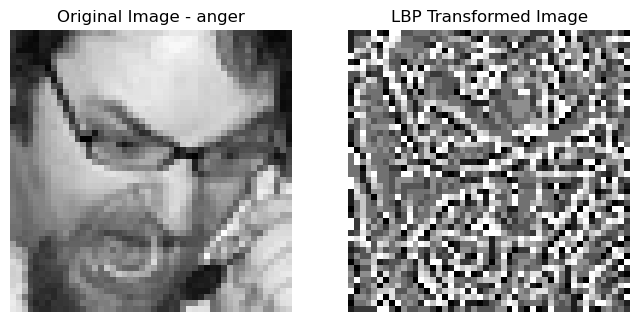

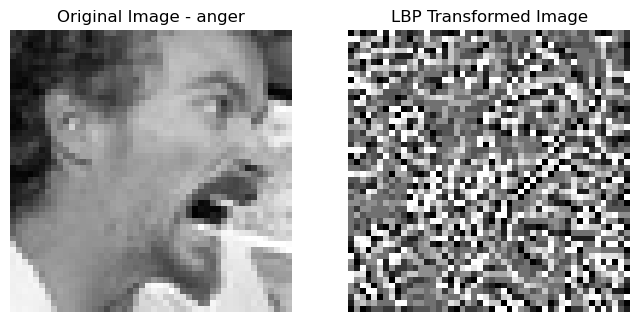

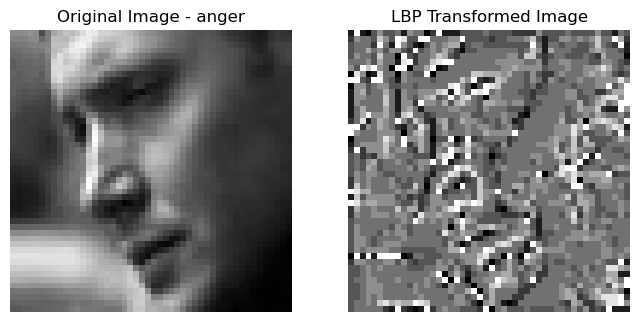

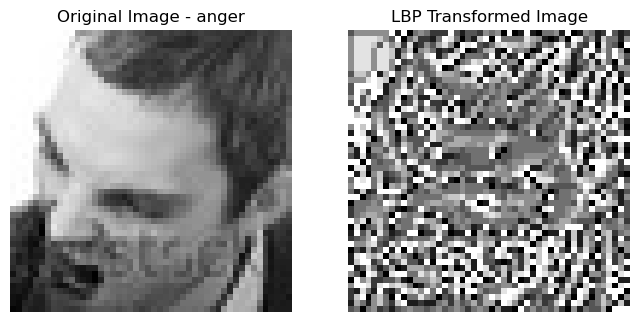

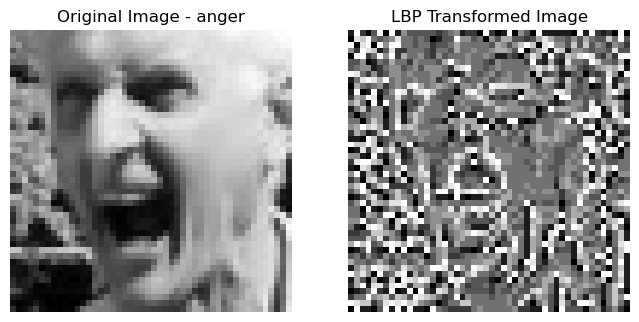

LBP features saved to 'train_lbp_features.csv'.


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
def load_images_from_folder(folder_path):
    
    data = []
    labels = []
    for label in os.listdir(folder_path):
        label_folder = os.path.join(folder_path, label)
        if os.path.isdir(label_folder):
            for file in os.listdir(label_folder):
                file_path = os.path.join(label_folder, file)
                image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    data.append((image, label))  
    return data


train_folder = "combine"


train_data = load_images_from_folder(train_folder)

def extract_lbp_features_and_visualize(images, num_samples=5):
   
    lbp_features = []
    labels = []
    
    
    for idx, (img, label) in enumerate(images):
        # Compute LBP
        lbp = local_binary_pattern(img, P=8, R=1, method='uniform')
        
       
        lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
        lbp_hist = lbp_hist.astype("float")
        lbp_hist /= (lbp_hist.sum() + 1e-6)  # Normalize the histogram
        
        lbp_features.append(lbp_hist)
        labels.append(label)
        
        
        if idx < num_samples:  
            plt.figure(figsize=(8, 4))
            plt.subplot(1, 2, 1)
            plt.imshow(img, cmap='gray')
            plt.title(f"Original Image - {label}")
            plt.axis('off')
            
            plt.subplot(1, 2, 2)
            plt.imshow(lbp, cmap='gray')
            plt.title("LBP Transformed Image")
            plt.axis('off')
            
            plt.show()
    
    return lbp_features, labels

# Extract features and visualize LBP images
lbp_features, labels = extract_lbp_features_and_visualize(train_data)

# =========================
# Step 3: Save LBP Features to CSV
# =========================

import pandas as pd

# Convert LBP features and labels to DataFrame
lbp_data = pd.DataFrame(lbp_features)
lbp_data['label'] = labels

# Save to CSV
lbp_data.to_csv("train_lbp_features.csv", index=False)
print("LBP features saved to 'train_lbp_features.csv'.")


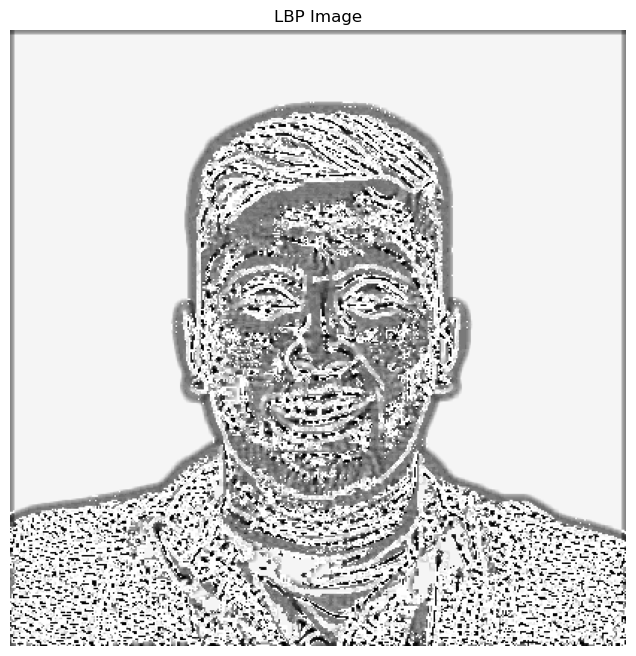

In [4]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

# Load the image
image_path = 'Roshan.png'  # Set your image file path here
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load the image. Check the file path.")
    exit()

# Parameters for LBP
radius = 3  # Radius of circular LBP
n_points = 8 * radius  # Number of points to consider in the circular neighborhood

# Compute the LBP image
lbp_image = local_binary_pattern(image, n_points, radius, method="uniform")

# Normalize the LBP image for visualization
lbp_image_normalized = cv2.normalize(lbp_image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Save and display the LBP image
cv2.imwrite('Roshan_LBP.png', lbp_image_normalized)  # Save the LBP image
cv2.imshow('LBP Image', lbp_image_normalized)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Optionally, plot the image using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(lbp_image_normalized, cmap='gray')
plt.title('LBP Image')
plt.axis('off')
plt.show()


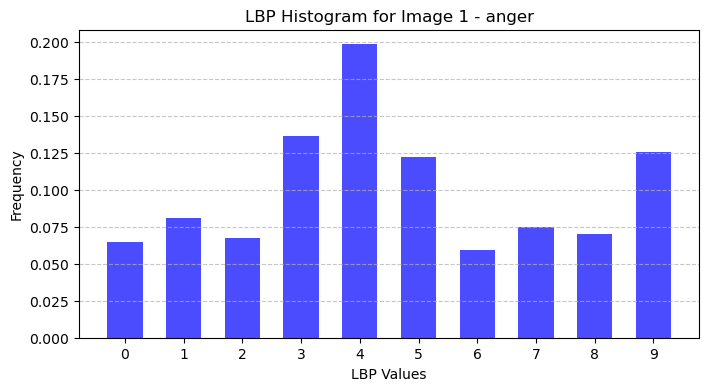

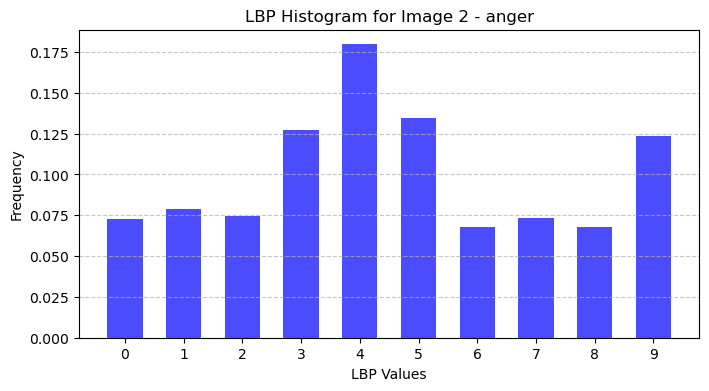

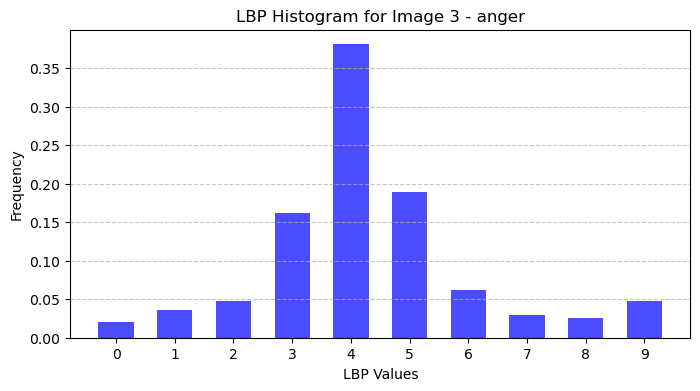

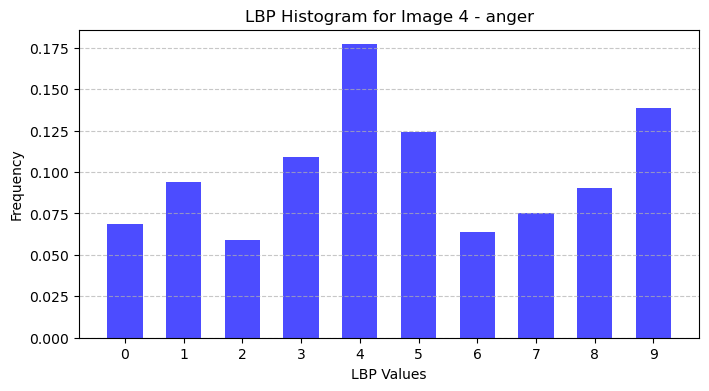

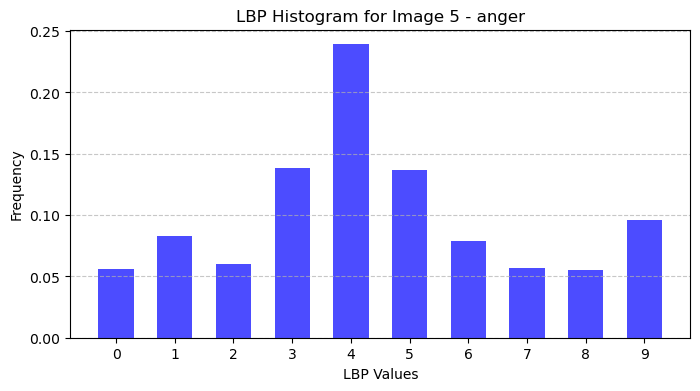

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lbp_histograms(images, num_samples=5):
   
    for idx, (img, label) in enumerate(images[:num_samples]):  # Limit to 'num_samples' images
        # Compute LBP
        lbp = local_binary_pattern(img, P=8, R=1, method='uniform')
        
        # Compute histogram of LBP
        lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
        lbp_hist = lbp_hist.astype("float")
        lbp_hist /= (lbp_hist.sum() + 1e-6)  # Normalize histogram
        
        # Plot the histogram
        plt.figure(figsize=(8, 4))
        plt.bar(range(10), lbp_hist, width=0.6, color='blue', alpha=0.7)
        plt.title(f"LBP Histogram for Image {idx + 1} - {label}")
        plt.xlabel("LBP Values")
        plt.ylabel("Frequency")
        plt.xticks(range(10))
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# =========================
# Visualize LBP Histograms
# =========================

# Plot histograms for LBP-transformed images
plot_lbp_histograms(train_data, num_samples=5)


In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load the CSV file
data = pd.read_csv("train_lbp_features.csv")
X = data.iloc[:, :-1].values  # Features
y = data['label'].values      # Labels

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Handle class imbalance (optional)
smote = SMOTE()
X, y = smote.fit_resample(X, y)

print("Data preprocessed successfully.")


Data preprocessed successfully.


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.6532815533980583
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.67      0.65      1838
           1       0.93      0.99      0.96      1849
           2       0.67      0.67      0.67      1883
           3       0.41      0.34      0.37      1835
           4       0.58      0.54      0.56      1793
           5       0.60      0.55      0.57      1854
           6       0.68      0.82      0.74      1823

    accuracy                           0.65     12875
   macro avg       0.64      0.65      0.65     12875
weighted avg       0.64      0.65      0.65     12875



Accuracy: 0.6532815533980583
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.67      0.65      1838
           1       0.93      0.99      0.96      1849
           2       0.67      0.67      0.67      1883
           3       0.41      0.34      0.37      1835
           4       0.58      0.54      0.56      1793
           5       0.60      0.55      0.57      1854
           6       0.68      0.82      0.74      1823

    accuracy                           0.65     12875
   macro avg       0.64      0.65      0.65     12875
weighted avg       0.64      0.65      0.65     12875



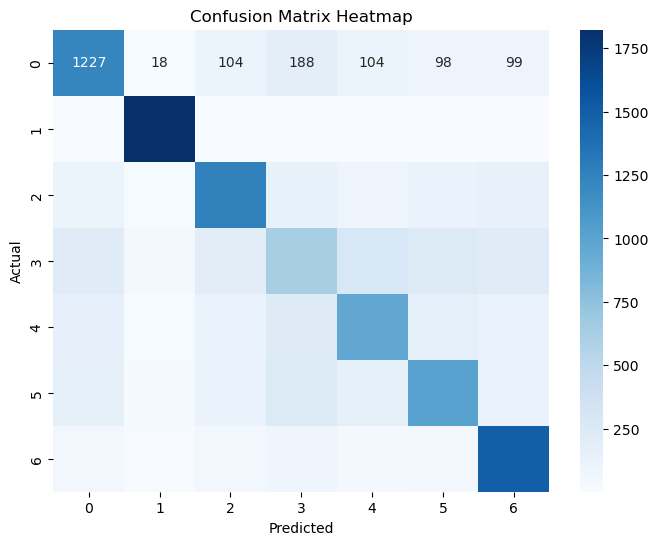

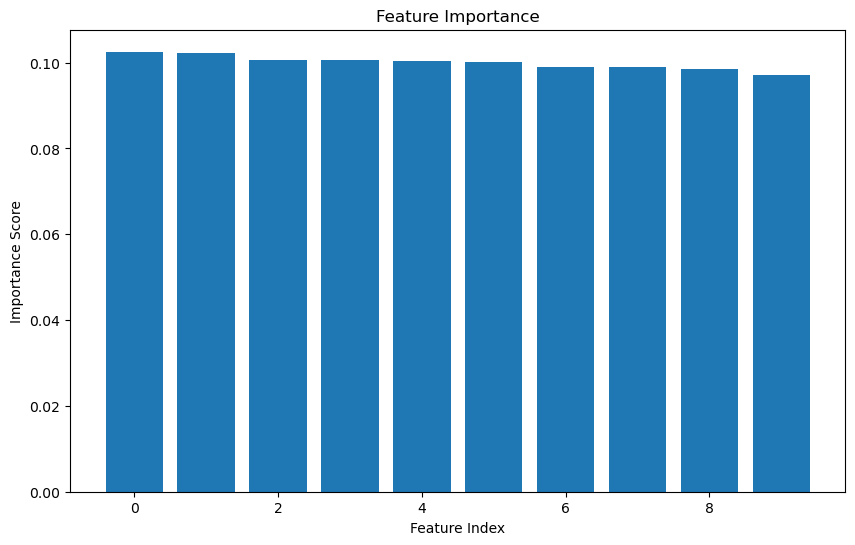

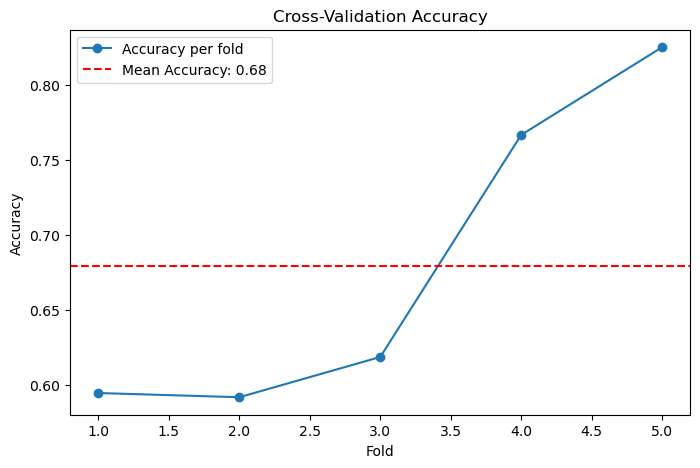

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix Heatmap")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.title("Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()


from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', label='Accuracy per fold')
plt.axhline(y=np.mean(cv_scores), color='r', linestyle='--', label=f'Mean Accuracy: {np.mean(cv_scores):.2f}')
plt.title('Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


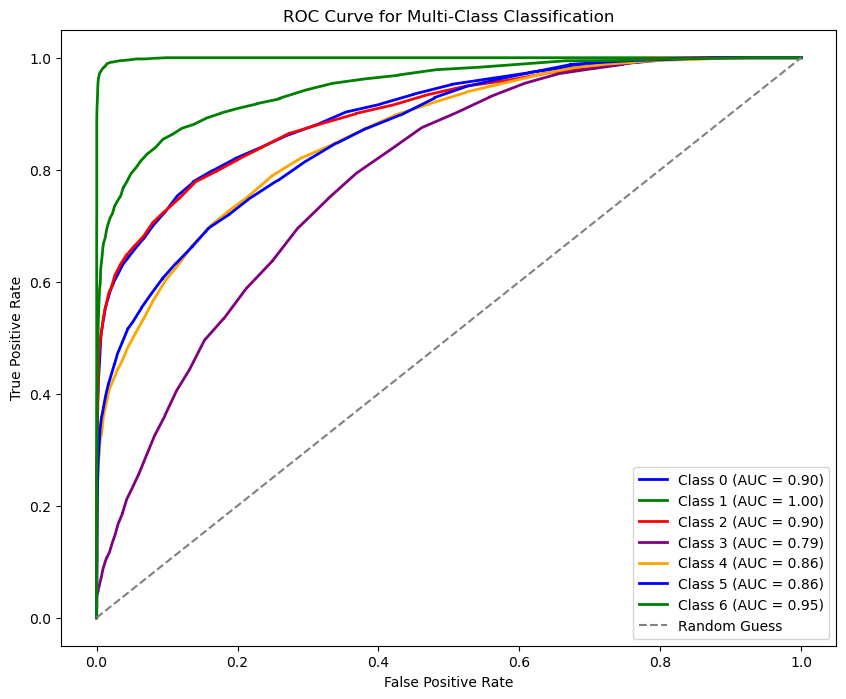

In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]


y_prob = model.predict_proba(X_test)


plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Add more colors if needed

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.6532815533980583
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.67      0.65      1838
           1       0.93      0.99      0.96      1849
           2       0.67      0.67      0.67      1883
           3       0.41      0.34      0.37      1835
           4       0.58      0.54      0.56      1793
           5       0.60      0.55      0.57      1854
           6       0.68      0.82      0.74      1823

    accuracy                           0.65     12875
   macro avg       0.64      0.65      0.65     12875
weighted avg       0.64      0.65      0.65     12875



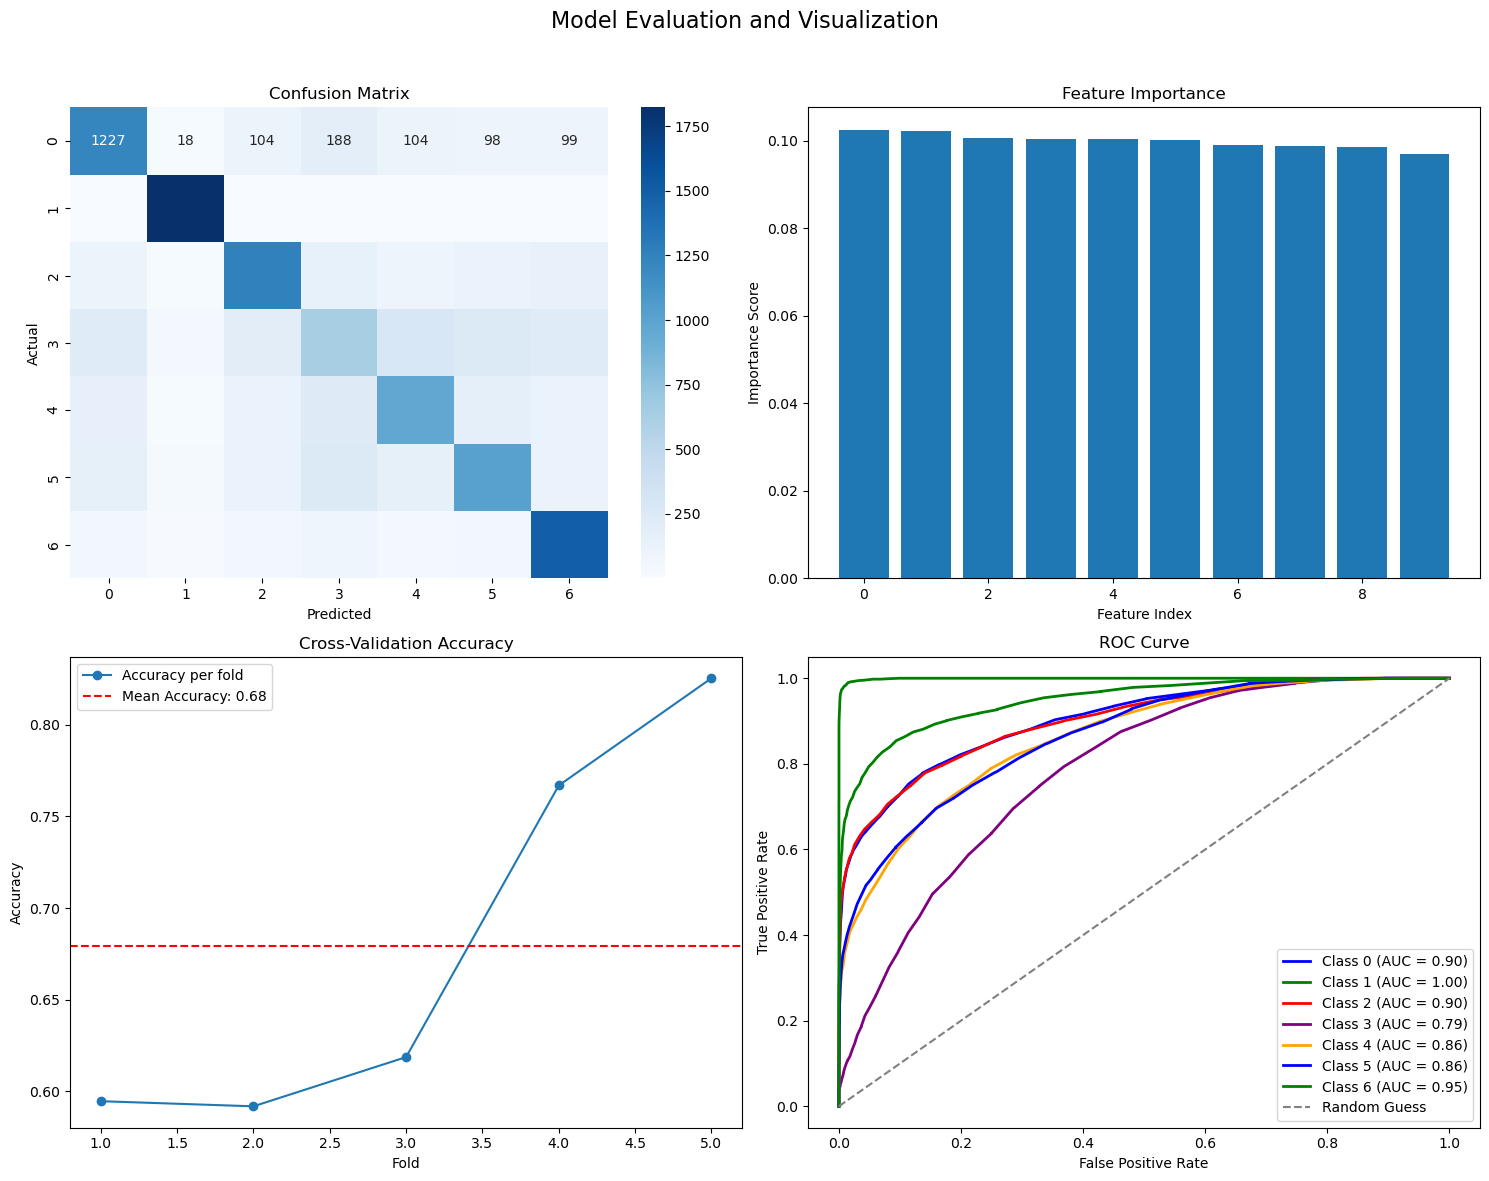

In [15]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y are already defined
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Model Evaluation and Visualization", fontsize=16)

# Plot 1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y), ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Actual")

# Plot 2: Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
axes[0, 1].bar(range(X_train.shape[1]), importances[indices], align="center")
axes[0, 1].set_title("Feature Importance")
axes[0, 1].set_xlabel("Feature Index")
axes[0, 1].set_ylabel("Importance Score")

# Plot 3: Cross-Validation Accuracy
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
axes[1, 0].plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', label='Accuracy per fold')
axes[1, 0].axhline(y=np.mean(cv_scores), color='r', linestyle='--', label=f'Mean Accuracy: {np.mean(cv_scores):.2f}')
axes[1, 0].set_title("Cross-Validation Accuracy")
axes[1, 0].set_xlabel("Fold")
axes[1, 0].set_ylabel("Accuracy")
axes[1, 0].legend()

# Plot 4: ROC Curve for Multi-Class
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_prob = model.predict_proba(X_test)
n_classes = y_test_binarized.shape[1]

colors = ['blue', 'green', 'red', 'purple', 'orange']  # Add more colors if needed
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    axes[1, 1].plot(fpr, tpr, color=colors[i % len(colors)], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
axes[1, 1].plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
axes[1, 1].set_title("ROC Curve")
axes[1, 1].set_xlabel("False Positive Rate")
axes[1, 1].set_ylabel("True Positive Rate")
axes[1, 1].legend(loc="lower right")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load images and labels from the dataset
def load_images_from_folder(folder_path):
    data = []
    labels = []
    class_mapping = {}
    label_counter = 0

    for label in os.listdir(folder_path):
        label_folder = os.path.join(folder_path, label)
        if os.path.isdir(label_folder):
            if label not in class_mapping:
                class_mapping[label] = label_counter
                label_counter += 1
            for file in os.listdir(label_folder):
                file_path = os.path.join(label_folder, file)
                image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    data.append((image, class_mapping[label]))  # Store image and numeric label
    return data, class_mapping

# Dataset path
train_folder = "combine"
data, class_mapping = load_images_from_folder(train_folder)

# Extract LBP features as images
def extract_lbp_images(images):
    transformed_images = []
    labels = []
    for img, label in images:
        lbp = local_binary_pattern(img, P=8, R=1, method='uniform')
        lbp = (lbp / lbp.max()) * 255  # Scale to 0-255 for visualization
        transformed_images.append(lbp.astype(np.uint8))
        labels.append(label)
    return np.array(transformed_images), np.array(labels)

# Transform images and labels
lbp_images, labels = extract_lbp_images(data)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lbp_images, labels, test_size=0.2, random_state=42)

# Preprocess data for CNN
X_train = X_train[..., np.newaxis] / 255.0  
X_test = X_test[..., np.newaxis] / 255.0
y_train = to_categorical(y_train, num_classes=len(class_mapping))
y_test = to_categorical(y_test, num_classes=len(class_mapping))

# Define a CNN model
def build_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and train the model
input_shape = X_train.shape[1:]  # Height, Width, Channel
num_classes = len(class_mapping)
model = build_cnn(input_shape, num_classes)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/10
916/916 [==============================] - 65s 70ms/step - loss: 1.6815 - accuracy: 0.3242 - val_loss: 1.4829 - val_accuracy: 0.4218
Epoch 2/10
916/916 [==============================] - 64s 70ms/step - loss: 1.4395 - accuracy: 0.4401 - val_loss: 1.4043 - val_accuracy: 0.4546
Epoch 3/10
916/916 [==============================] - 68s 75ms/step - loss: 1.3188 - accuracy: 0.4949 - val_loss: 1.3625 - val_accuracy: 0.4737
Epoch 4/10
916/916 [==============================] - 68s 74ms/step - loss: 1.2081 - accuracy: 0.5388 - val_loss: 1.3557 - val_accuracy: 0.4795
Epoch 5/10
916/916 [==============================] - 65s 71ms/step - loss: 1.0915 - accuracy: 0.5885 - val_loss: 1.3830 - val_accuracy: 0.4741
Epoch 6/10
916/916 [==============================] - 66s 72ms/step - loss: 0.9682 - accuracy: 0.6385 - val_loss: 1.4504 - val_accuracy: 0.4681
Epoch 7/10
916/916 [==============================] - 62s 67ms/step - loss: 0.8400 - accuracy: 0.6904 - val_loss: 1.5776 - val_accuracy:

In [1]:
import os
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import h5py  # Library for saving in .h5 format

# Step 1: Load and preprocess images
def load_images_from_folder(folder_path):
    """Load images and their labels from folder."""
    data = []
    labels = []
    for label in os.listdir(folder_path):
        label_folder = os.path.join(folder_path, label)
        if os.path.isdir(label_folder):
            for file in os.listdir(label_folder):
                file_path = os.path.join(label_folder, file)
                image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    data.append((image, label))  # Store image and its label
    return data

# Step 2: Extract LBP histograms
def extract_lbp_histograms(data):
    """Extract LBP histograms for images."""
    lbp_features = []
    labels = []
    for img, label in data:
        # Compute LBP
        lbp = local_binary_pattern(img, P=8, R=1, method='uniform')
        # Compute normalized histogram of LBP
        lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
        lbp_hist = lbp_hist.astype("float")
        lbp_hist /= (lbp_hist.sum() + 1e-6)  # Normalize histogram
        lbp_features.append(lbp_hist)
        labels.append(label)
    return np.array(lbp_features), np.array(labels)

# Load dataset
train_folder = "combine"
train_data = load_images_from_folder(train_folder)

# Extract features
X, y = extract_lbp_histograms(train_data)

# Encode labels
unique_labels = list(set(y))
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
y_encoded = np.array([label_to_index[label] for label in y])

# Step 3: Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Step 4: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=unique_labels))

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 6: Save the model as .h5
with h5py.File("facemodel.h5", "w") as h5f:
    h5f.create_dataset("X_train", data=X_train)
    h5f.create_dataset("X_test", data=X_test)
    h5f.create_dataset("y_train", data=y_train)
    h5f.create_dataset("y_test", data=y_test)
    h5f.create_dataset("rf_model", data=np.array(rf_model.feature_importances_))  # Save feature importances
    h5f.attrs['accuracy'] = accuracy  # Save accuracy as metadata

print("Model and data saved as 'facemodel.h5'")


Classification Report:
              precision    recall  f1-score   support

     neutral       0.27      0.24      0.25      1240
       happy       0.33      0.61      0.43      1840
        fear       0.32      0.17      0.23      1039
     disgust       1.00      0.19      0.32       109
       anger       0.29      0.14      0.19      1018
     sadness       0.27      0.20      0.23      1232

    accuracy                           0.31      6478
   macro avg       0.41      0.26      0.28      6478
weighted avg       0.31      0.31      0.29      6478

Test Accuracy: 31.09%
Model and data saved as 'facemodel.h5'


In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import mediapipe as mp

# Load the trained model
model_best = load_model('face_model.h5')  # Set your machine model file path here

# Classes: 7 emotional states
class_names = ['Angry', 'Disgusted', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load Mediapipe FaceMesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5)

# Open a connection to the webcam (0 is usually the default camera)
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB for Mediapipe processing
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame for facial landmarks
    results = face_mesh.process(rgb_frame)

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces using Haar Cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    # Process each detected face
    for (x, y, w, h) in faces:
        # Extract the face region
        face_roi = frame[y:y + h, x:x + w]

        # Resize the face image to the required input size for the model
        face_image = cv2.resize(face_roi, (48, 48))
        face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
        face_image = image.img_to_array(face_image)
        face_image = np.expand_dims(face_image, axis=0)
        face_image = np.vstack([face_image])

        # Predict emotion using the loaded model
        predictions = model_best.predict(face_image)
        emotion_label = class_names[np.argmax(predictions)]

        # Display the emotion label on the frame
        cv2.putText(frame, f'Emotion: {emotion_label}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.9, (0, 0, 255), 2)

        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Overlay facial landmarks on the frame
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            for landmark in face_landmarks.landmark:
                ih, iw, _ = frame.shape
                x, y = int(landmark.x * iw), int(landmark.y * ih)
                cv2.circle(frame, (x, y), 1, (0, 255, 0), -1)

    # Display the resulting frame
    cv2.imshow('Emotion Detection with Face Landmarks', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()


C:\Users\admin\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 [==============================] - 0s 32ms/step


In [ ]:
import tkinter as tk
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import mediapipe as mp
from PIL import Image, ImageTk  # For handling images in Tkinter

# Load the trained model
model_best = load_model('face_model.h5')  # Set your machine model file path here

# Classes: 7 emotional states
class_names = ['Angry', 'Disgusted', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load Mediapipe FaceMesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5)

# Open a connection to the webcam (0 is usually the default camera)
cap = cv2.VideoCapture(0)

# Create a Tkinter window
root = tk.Tk()
root.title("Emotion Detection")
root.geometry("800x600")

# Label to show the emotion
emotion_label = tk.Label(root, text="Emotion: ", font=("Helvetica", 16))
emotion_label.pack(pady=10)

# Canvas to display webcam frames
canvas = tk.Canvas(root, width=640, height=480)
canvas.pack()

def update_frame():
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        return
    
    # Convert the frame to RGB for Mediapipe processing
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame for facial landmarks
    results = face_mesh.process(rgb_frame)

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces using Haar Cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    # Process each detected face
    for (x, y, w, h) in faces:
        # Extract the face region
        face_roi = frame[y:y + h, x:x + w]

        # Resize the face image to the required input size for the model
        face_image = cv2.resize(face_roi, (48, 48))
        face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
        face_image = image.img_to_array(face_image)
        face_image = np.expand_dims(face_image, axis=0)
        face_image = np.vstack([face_image])

        # Predict emotion using the loaded model
        predictions = model_best.predict(face_image)
        emotion = class_names[np.argmax(predictions)]

        # Update emotion label in the Tkinter window
        emotion_label.config(text=f"Emotion: {emotion}")

        # Display the emotion label on the frame
        cv2.putText(frame, f'Emotion: {emotion}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.9, (0, 0, 255), 2)

        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Overlay facial landmarks on the frame
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            for landmark in face_landmarks.landmark:
                ih, iw, _ = frame.shape
                x, y = int(landmark.x * iw), int(landmark.y * ih)
                cv2.circle(frame, (x, y), 1, (0, 255, 0), -1)

    # Convert frame to ImageTk format
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(frame_rgb)
    imgtk = ImageTk.PhotoImage(image=img)

    # Update the canvas with the new frame
    canvas.create_image(0, 0, anchor=tk.NW, image=imgtk)
    canvas.imgtk = imgtk

    # Call this function again after 10ms
    root.after(10, update_frame)

# Start the video capture and the Tkinter UI
update_frame()
root.mainloop()

# Release the webcam after closing the Tkinter window
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 31ms/step


C:\Users\admin\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 [==============================] - 0s 29ms/step
